## Customer Churn

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Preprocessing

In [3]:
# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(df['TotalCharges'].mean(), inplace=True)

In [4]:
# Encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])


In [5]:
# Encode the target variable
df['Churn'] = le.fit_transform(df['Churn'])

In [6]:
# Split the data into features and labels
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']


In [7]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [10]:
# Initialize the ANN
model = Sequential()

In [11]:
# Input Layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Hidden Layers
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3)) 
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu'))

In [13]:
# Output Layer
model.add(Dense(units=1, activation='sigmoid'))

In [14]:
# Compile the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50


177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.7356 - loss: 0.5159 - val_accuracy: 0.8112 - val_loss: 0.4169
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.7909 - loss: 0.4346 - val_accuracy: 0.7956 - val_loss: 0.4208
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.7906 - loss: 0.4303 - val_accuracy: 0.8084 - val_loss: 0.4071
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.7946 - loss: 0.4305 - val_accuracy: 0.8169 - val_loss: 0.4080
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.7964 - loss: 0.4198 - val_accuracy: 0.8098 - val_loss: 0.4086
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.8073 - loss: 0.4154 - val_accuracy: 0.8048 - val_loss: 0.4090
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.8020 - loss: 0.4120 - val_accuracy: 0.8105 - val_loss: 0.4078
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.8036 - loss: 0.4119 - val_accurac

## Model Evaluation and Visualization

In [16]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

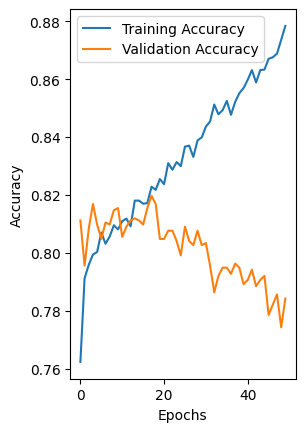

In [17]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

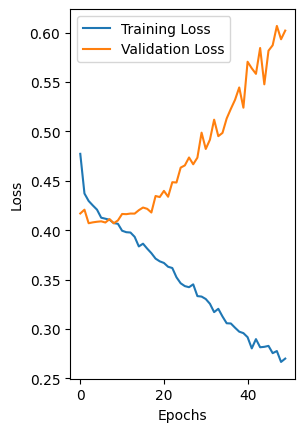

In [18]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [20]:
# Model Evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step


In [21]:
# Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7842441447835344

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1036
           1       0.59      0.61      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.73      1409
weighted avg       0.79      0.78      0.79      1409



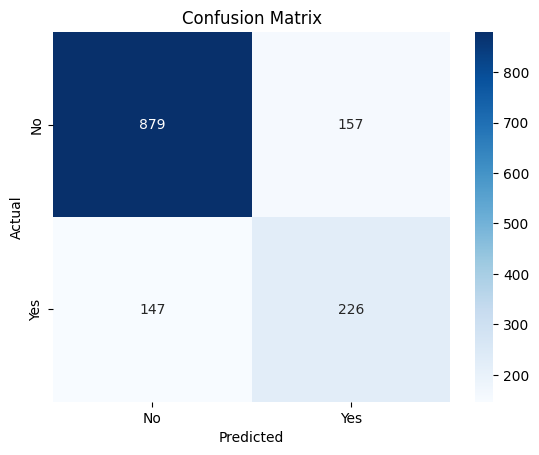

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()